<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/GoldPricePrediction(RandomForestRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Updated file_path to include the correct filename and extension
file_path = "gld_price_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "altruistdelhite04/gold-price-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
#Checking for null values
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


**Correlation**

---


*   Positive Correlation - when one feature increases the other feature increases as well.
*   Negetive Correlation - when one feature increases the other feature decreases.




In [53]:
df=df.drop('Date',axis=1)
df.head()
correlation=df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

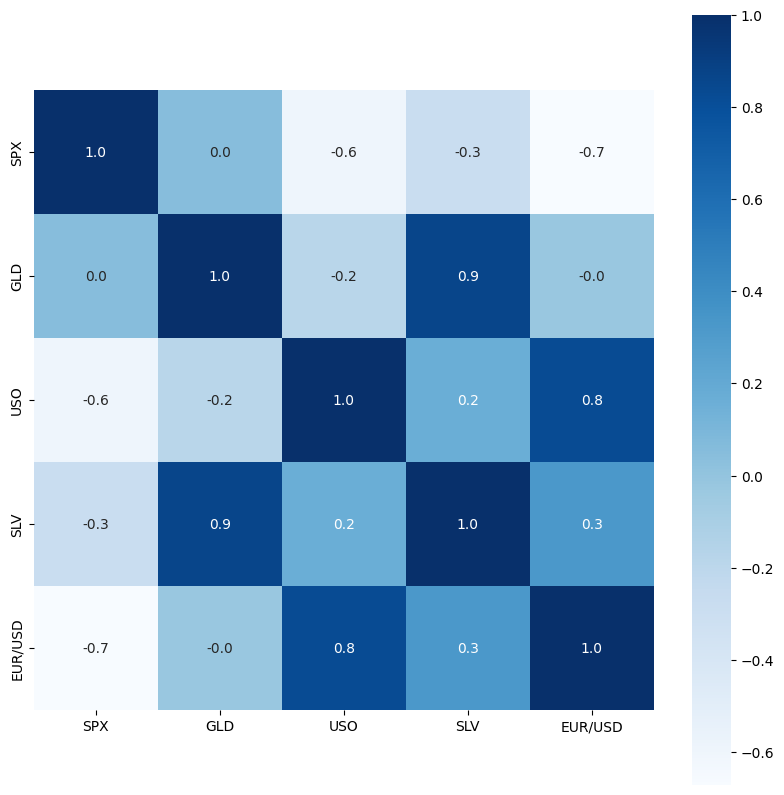

In [39]:
#Mapping a heatmap of the correlation values
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='Blues',fmt='.1f',square=True)

In [40]:
correlation['GLD']

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


<Axes: xlabel='GLD', ylabel='Density'>

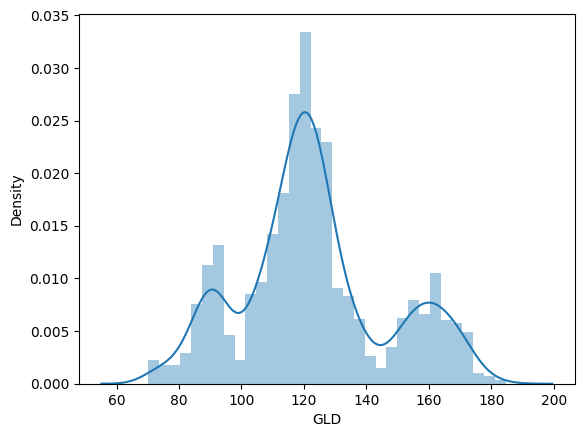

In [45]:
#Tells about the density of the gold prices
sns.distplot(df['GLD'])
#Shows that the gold prices have mostly been around 120

predictions :  [122.42029923 129.94220319 127.74880007  96.64849721 118.6636007
 114.5240995  124.8721013  117.70249924 108.14250097  98.45109958
  95.62529928 167.3879984  149.89480063 116.08720047 170.45860072
  84.83019974 123.29129865 109.17829709 113.21070114 131.73170266
 124.30319901 113.62480101 115.75700091 108.76229938 108.55970137
 125.81569923 118.13209998 112.64359901 113.49550155 125.23179892
 146.08130187  89.38079988 167.62380021 113.67489953 108.41500059
 120.24990113 142.05629913 161.31570151 173.73249799 153.26960122
 119.54960132 113.72070035 121.37359949 113.67709919 122.04470033
 107.96150053  88.61289904 114.29409928 130.01810239 117.95980109
 103.76939977 130.0899029  107.30129824 160.59450364 131.48480019
 118.77589996 147.19690031 135.17110245  95.33290104 124.66780168
 115.18009892  86.12390089 104.23829951 113.7579005   84.23569933
 122.27550027 116.37599879 113.53810202 165.41750138  92.31740041
  80.30220091 161.11410096 158.60390178 106.68000024 148.97400